In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import gudhi
from pogo import Pogo
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from umap import UMAP,plot
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from scipy.spatial.distance import is_valid_dm
import seaborn as sns#; sns.set_theme()


/home/a/Desktop/ds/env/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/a/Desktop/ds/env/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/a/Desktop/ds/env/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [2]:
pogo=Pogo()

In [3]:
hf = h5py.File('mouse_ES_cell.h5', 'r')
matrix = np.array(hf.get('X'))
ground_truth = np.array(hf.get('Y'))

In [4]:
hf = h5py.File('Quake_Smart-seq2_Diaphragm/data.h5', 'r')


In [5]:
exprs = hf.get('exprs')
np.array(exprs)

array(['data', 'indices', 'indptr', 'shape'], dtype='<U7')

In [6]:
obs = hf.get('obs')
np.array(obs)

array(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'channel',
       'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender',
       'organ', 'organism', 'platform', 'region'], dtype='<U19')

In [7]:
ground_truth = np.array(obs.get('cluster'))
ground_truth.shape

(870,)

In [8]:
uns = hf.get('uns')
np.array(uns)

array(['expressed_genes', 'scmap_genes', 'seurat_genes'], dtype='<U15')

In [9]:
data = np.array(exprs.get('data'))

In [10]:
num_rows = np.array(exprs.get('shape'))[0]
num_columns = np.array(exprs.get('shape'))[1]

In [11]:
print(num_rows)
print(num_columns)

870
23341


In [12]:
indices = np.array(exprs.get('indices'))

In [13]:
indptr = np.array(exprs.get('indptr'))

In [14]:
matrix = csr_matrix((data, indices, indptr), shape=(num_rows, num_columns)).toarray()

In [15]:
print(matrix.shape)
matrix

(870, 23341)


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0., 101.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  67.,   0., ...,   0.,   0.,   0.]])

In [16]:
cmdist = pdist(matrix, 'correlation')

In [17]:
cmdist.shape

(378015,)

In [18]:
mdist = squareform(cmdist, force='no', checks=True)

In [19]:
mdist.shape

(870, 870)

In [20]:
mdist

array([[0.        , 0.2481567 , 0.40205085, ..., 0.22494164, 0.23790942,
        0.22910211],
       [0.2481567 , 0.        , 0.11709152, ..., 0.14066171, 0.15410543,
        0.13934981],
       [0.40205085, 0.11709152, 0.        , ..., 0.33600546, 0.34593477,
        0.33774251],
       ...,
       [0.22494164, 0.14066171, 0.33600546, ..., 0.        , 0.06431486,
        0.06122598],
       [0.23790942, 0.15410543, 0.34593477, ..., 0.06431486, 0.        ,
        0.08066253],
       [0.22910211, 0.13934981, 0.33774251, ..., 0.06122598, 0.08066253,
        0.        ]])

In [21]:
is_valid_dm(mdist)

True

In [22]:
#Heatmap

#ax = sns.heatmap(mdist,cmap='Spectral')#, vmin=0, vmax=1, center=0.8)

#plt.title('Heatmap')
#plt.savefig('heatmap',dpi=100)

In [23]:
negmdist = np.negative(mdist)
similarity_matrix  = np.exp(negmdist)

CPU times: user 48 ms, sys: 98.9 ms, total: 147 ms
Wall time: 85.9 ms


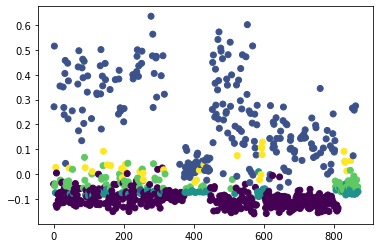

In [24]:
kpca_1d_model = KernelPCA(n_components=1, kernel='precomputed')
%time kpca1 = kpca_1d_model.fit_transform(similarity_matrix)
y = kpca1[:,0]
X = range(len(y))
plt.scatter(X,y,c=ground_truth)

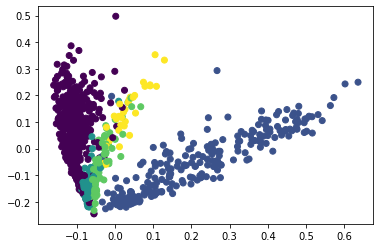

In [25]:

kpca_2d_model = KernelPCA(n_components=2, kernel='precomputed',random_state=42)
kpca2 = kpca_2d_model.fit_transform(similarity_matrix)
X = kpca2[:,0]
y = kpca2[:,1]
plt.scatter(X,y,c=ground_truth)

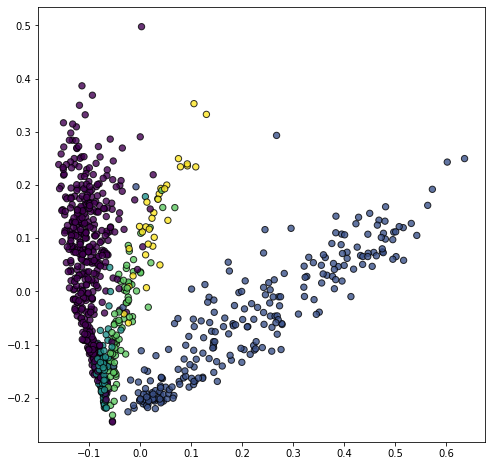

In [26]:

X = kpca2[:,0]
y = kpca2[:,1]
plt.figure(figsize=(8,8))
scatter = plt.scatter(X,y,
            s=40, 
            c=ground_truth,
            marker="o",
            #cmap=viridis,
            norm=None,
            alpha=.8,
            edgecolor="k",
            vmin = 0)

plt.show()

CPU times: user 51.7 ms, sys: 119 ms, total: 171 ms
Wall time: 65.3 ms


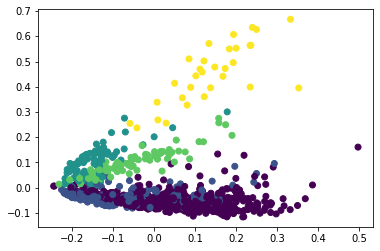

In [27]:
kpca_3d_model = KernelPCA(n_components=3, kernel='precomputed')
%time kpca3 = kpca_3d_model.fit_transform(similarity_matrix)
X = kpca3[:,1]
y = kpca3[:,2]
plt.scatter(X,y,c=ground_truth)

Text(0.5, 0.92, 'KPCA Embedding in 3D')

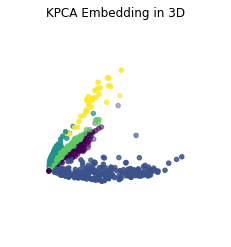

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kpca3[:,0],kpca3[:,1],kpca3[:,2],c = ground_truth, cmap='viridis')
ax.set_axis_off()

#plt.legend(handles=scatter.legend_elements()[0],bbox_to_anchor=(1,1), labels=list(dict12.keys()))

plt.title('KPCA Embedding in 3D')
#plt.savefig('KPCA Embedding in 3D',dpi=100)

/home/a/Desktop/ds/env/lib/python3.8/site-packages/umap/umap_.py:1503: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


CPU times: user 9.25 s, sys: 283 ms, total: 9.53 s
Wall time: 8.01 s


Text(0.5, 1.0, 'Unlabeled UMAP Embedding in 2D')

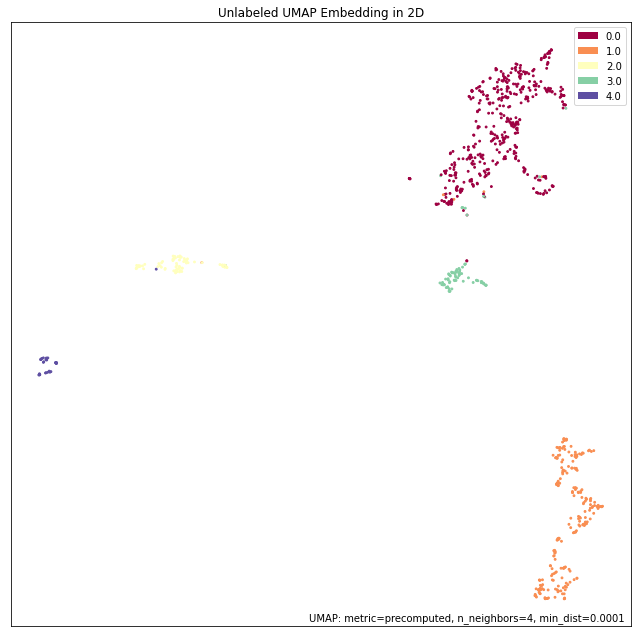

In [29]:
#Create 2-d umap dimensionality reduction embedding to visualize unsupervised models
umap_model_2d = UMAP(metric='precomputed',min_dist=0.0001,n_neighbors=4)
%time umap_embedding = umap_model_2d.fit_transform(mdist)
plot.points(umap_model_2d,labels=ground_truth)

plt.title('Unlabeled UMAP Embedding in 2D')

In [30]:
umap_embedding.shape

(870, 2)

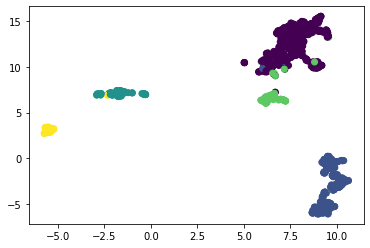

In [31]:
plt.scatter(umap_embedding[:,0], umap_embedding[:,1],c=ground_truth)

In [32]:
umap_model_33d = UMAP(metric='precomputed',min_dist=0.0001,n_neighbors=4,n_components=33)
umap_embedding_33d = umap_model_33d.fit_transform(mdist)

/home/a/Desktop/ds/env/lib/python3.8/site-packages/umap/umap_.py:1503: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


In [33]:
#run pogo on embeddings

In [99]:
kpca = KernelPCA(n_components=6, kernel='precomputed')
%time embedding = kpca.fit_transform(similarity_matrix)

CPU times: user 134 ms, sys: 116 ms, total: 250 ms
Wall time: 87.4 ms


In [130]:
umap= UMAP(metric='precomputed',min_dist=0.0001,n_neighbors=4,n_components=2)
%time embedding = umap.fit_transform(mdist)

/home/a/Desktop/ds/env/lib/python3.8/site-packages/umap/umap_.py:1503: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


CPU times: user 5.21 s, sys: 387 ms, total: 5.6 s
Wall time: 3.6 s


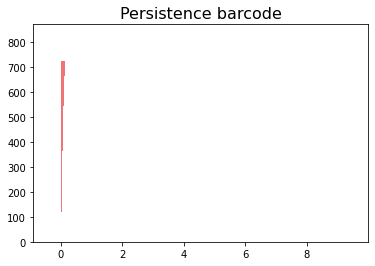

In [131]:
rips_complex = gudhi.RipsComplex(points=embedding)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
diag = simplex_tree.persistence()

gudhi.plot_persistence_barcode(diag)
plt.show()

In [132]:
persistence_module = simplex_tree.persistence()

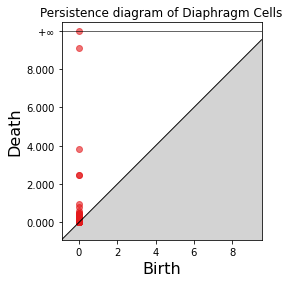

In [133]:
ax = gudhi.plot_persistence_diagram(persistence=persistence_module)
# We can modify the title, aspect, etc.
ax.set_title("Persistence diagram of Diaphragm Cells")
ax.set_aspect("equal")  # forces to be square shaped
plt.show()

In [134]:
%time pogo.fit(embedding)

CPU times: user 34.7 s, sys: 5.34 s, total: 40 s
Wall time: 33.1 s


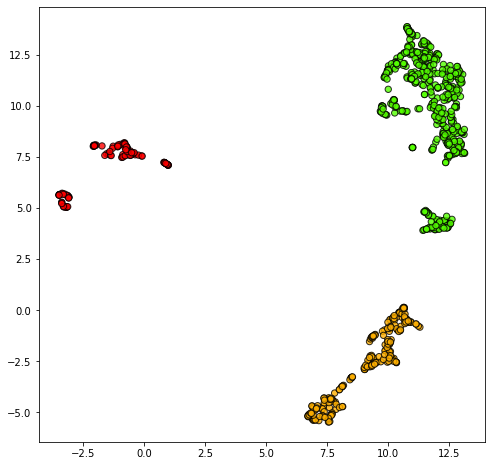

CPU times: user 189 ms, sys: 120 ms, total: 308 ms
Wall time: 177 ms


In [135]:
%time pogo.plot()

In [136]:
pogo.idx_

77722

In [137]:
pogo.labels_

array([0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [138]:
pogo.candidates_

[116347,
 26242,
 77722,
 14637,
 20735,
 10897,
 7346,
 5068,
 9843,
 6559,
 9111,
 8530,
 4567,
 6333,
 3896,
 6140,
 3687,
 4258,
 4950,
 4458,
 3530,
 4116,
 3847,
 4378,
 4215,
 3506,
 4082,
 3610,
 4184,
 4166,
 4430,
 3656,
 4067,
 3675,
 3636,
 77695,
 3498,
 4114,
 4429,
 4946,
 61115,
 60972,
 60267,
 60971,
 60975,
 61137,
 61114,
 60970,
 61135,
 61112,
 61113,
 60171,
 61136,
 61134,
 61133,
 61129,
 60234,
 61116,
 61120,
 60240,
 60238,
 60237,
 61121,
 61122,
 60241,
 61119,
 60973,
 60265,
 61118,
 61138,
 61123,
 61124,
 60974,
 61125,
 61126,
 61127,
 60266,
 60236,
 61128,
 60239,
 61130,
 61131,
 60235,
 61117,
 61132,
 60989,
 60233,
 61139,
 61174,
 61181,
 61180,
 61179,
 61178,
 61177,
 61176,
 61175,
 60964,
 61183,
 60226,
 61173,
 61172,
 61171,
 60227,
 61170,
 60965,
 61182,
 60225,
 60969,
 61188,
 60960,
 61193,
 61192,
 61191,
 61190,
 60961,
 61189,
 61187,
 60224,
 61186,
 60962,
 60963,
 60223,
 61185,
 60268,
 61184,
 61169,
 60228,
 61168,
 61147,


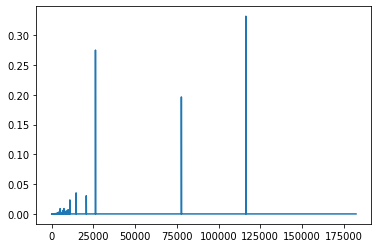

In [139]:
plt.plot(pogo.gap_vector_)

Maximum Silhouette: 77722


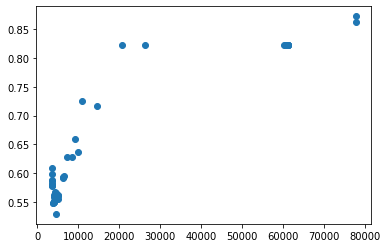

In [140]:
silhouette_indices, silhouette_array = pogo.plot_silhouette()

Maximum Silhouette Score: 26242


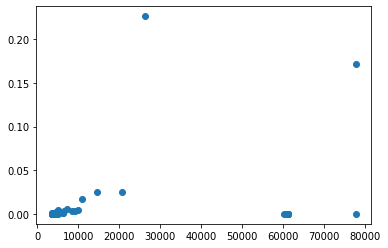

In [141]:
score_indices, score_array = pogo.plot_silhouette_score()

Maximum Rand Score: 26242


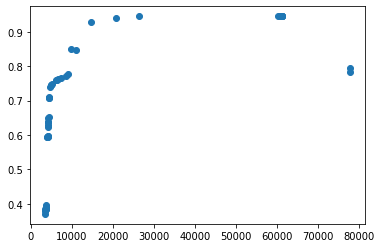

In [142]:
rand_indices, rand_array = pogo.plot_rand_score(ground_truth)


In [143]:
np.argmax(rand_array)

0

In [144]:
max(rand_array)

0.9457565196462075

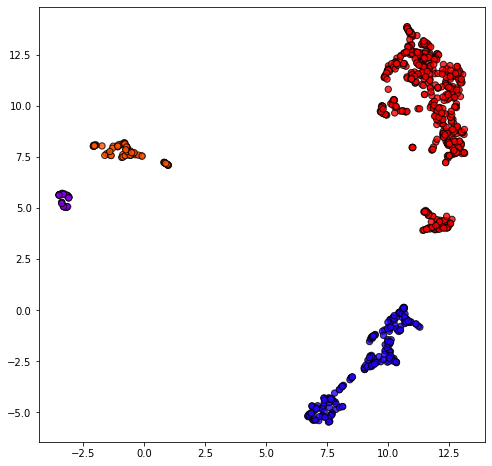

In [148]:
pogo.plot(26242)